## **Importing all required libraries**


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## **Displaying the test image**

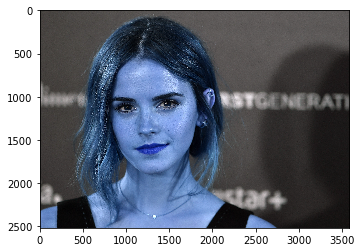

In [2]:

image = cv2.imread('Sample_Images/emma.jpg')
plt.imshow(image , cmap=None)



## **Converting to grayscale**

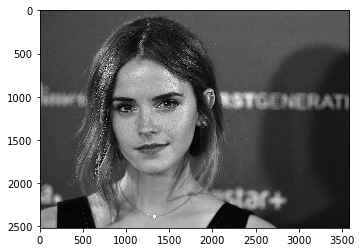

In [5]:
# Converting to grayscale as opencv  detector takes in input gray scale images

test_image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Displaying grayscale image
plt.imshow(test_image_gray, cmap='gray')

## **Function to convert gray images to RGB**

In [6]:
#Function to convert gray images to RGB
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


**OpenCV provides pre-trained models for detecting various objects like car , etc . here we are using haar cascade file for face detection only . One can train her own models too.**

## **Loading harcascade classifier for frontal face**

In [7]:

haar_cascade_face = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')

## **Detecting faces**

In [8]:
#Detects the faces in the input image and this function will return the co-ordinates(x and y posiiton plus the height and width) of the detected faces as Rect(x,y,w,h).
faces_rects = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor = 1.1, minNeighbors = 4);

# Let us print the no. of faces found
print('Faces found: ', len(faces_rects))

Faces found:  1


In [10]:
# loop over all the co-ordinates it returned and draw rectangles around them using Open CV.We will be drawing a greenand yellow rectangle with thicknessof 15
for (x,y,w,h) in faces_rects:
     cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 255), 15)

## **Display rectangle over detected face**

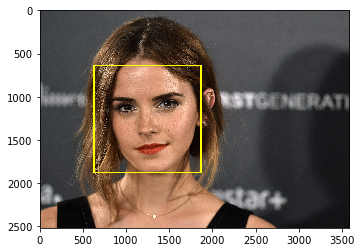

In [12]:
plt.imshow(convertToRGB(image))

## **General function for face detection**

In [13]:
def detect_faces(cascade, test_img, scaleFactor = 1.1):
    # create a copy of the image to prevent any changes to the original one.
    img_copy = test_img.copy()
    
    #convert the test image to gray scale as opencv face detector expects gray images
    gray_image = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    
    # Applying the haar classifier to detect faces
    faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=5)
    
    for (x, y, w, h) in faces_rect:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 0, 255), 5)
        
    return img_copy

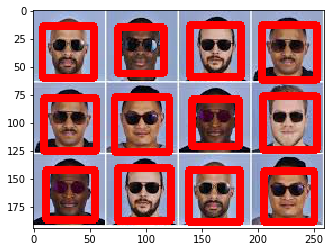

In [14]:
#loading image testing_2
test_image2 = cv2.imread('Sample_Images/group.jpeg')

#call the function to detect faces
faces = detect_faces(haar_cascade_face, test_image2)

#convert to RGB and display image
plt.imshow(convertToRGB(faces))

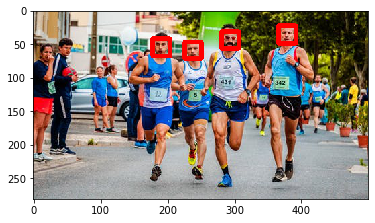

In [15]:
#loading image testing_2
test_image3 = cv2.imread('Sample_Images/run2.jpeg')

#call the function to detect faces
faces = detect_faces(haar_cascade_face, test_image3)

#convert to RGB and display image
plt.imshow(convertToRGB(faces))

## **Saving output images**

In [16]:

cv2.imwrite('image1.png',faces)

True